# Logistic Regression Binary Classification - Breast Cancer Dataset

This demonstrates how to build a binary classifier using Logistic Regression on the Breast Cancer Wisconsin dataset from `scikit-learn`. It includes data preprocessing, model training, evaluation using metrics like ROC-AUC, and threshold tuning with sigmoid visualization.


In [2]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix, classification_report, accuracy_score,
    roc_curve, roc_auc_score, precision_score, recall_score
)


## Load and Explore the Dataset

We load the breast cancer dataset and convert it to a Pandas DataFrame. We'll also inspect its shape and a preview of the data.


In [3]:
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

print("Dataset shape:", df.shape)
df.head()


Dataset shape: (569, 31)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


## Split Dataset into Train and Test Sets

We split the data into training and testing sets to evaluate model performance on unseen data.


In [4]:
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Standardize Features

We scale the features to have zero mean and unit variance using `StandardScaler`.


In [5]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## Train Logistic Regression Model

We train a Logistic Regression model on the scaled training data.


In [6]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)


LogisticRegression()

## Predict and Evaluate the Model

We predict on the test set and evaluate accuracy, precision, recall, and the confusion matrix.


In [7]:
y_pred = model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9736842105263158

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


Confusion Matrix:
 [[41  2]
 [ 1 70]]


## Plot ROC Curve and Calculate AUC

We evaluate the model’s performance using ROC-AUC score and plot the ROC curve.


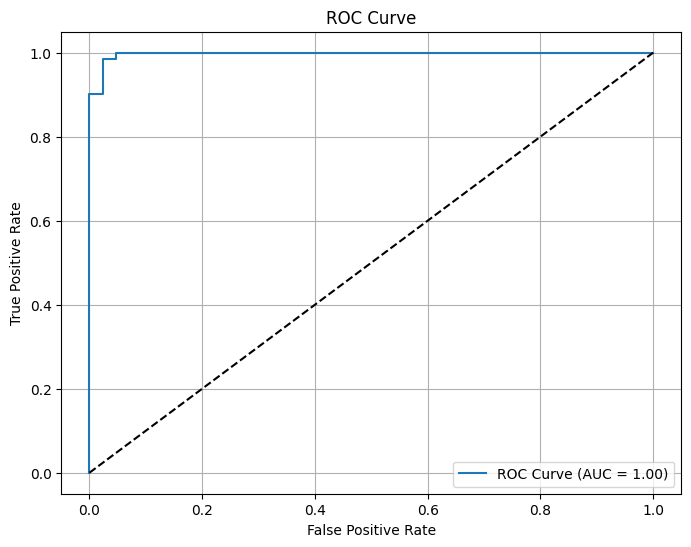

In [8]:
y_prob = model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()


## Custom Threshold Tuning

By default, Logistic Regression uses a threshold of 0.5 to classify instances. We explore how changing the threshold affects precision and recall.


In [9]:
custom_threshold = 0.3  # You can adjust this
y_pred_custom = (y_prob >= custom_threshold).astype(int)

print(f"\nPrecision at threshold {custom_threshold}:", precision_score(y_test, y_pred_custom))
print(f"Recall at threshold {custom_threshold}:", recall_score(y_test, y_pred_custom))



Precision at threshold 0.3: 0.9726027397260274
Recall at threshold 0.3: 1.0


##  Visualize the Sigmoid Function

Logistic Regression uses the sigmoid function to map input values into probabilities. Here's how it looks:


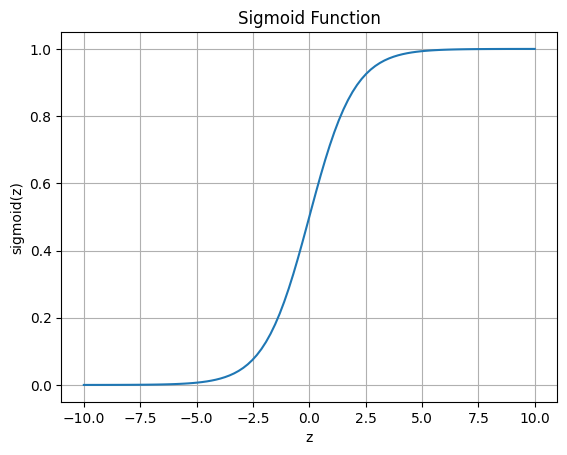

In [10]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

z = np.linspace(-10, 10, 100)
plt.plot(z, sigmoid(z))
plt.title("Sigmoid Function")
plt.xlabel("z")
plt.ylabel("sigmoid(z)")
plt.grid(True)
plt.show()
